Using the Beginner solver
0 215
1 149
2 220
3 207
4 225
Using the CFOP solver
0 94
1 106
2 100
3 107
4 95
Using the Kociemba solver
0 21
1 21
2 22
3 22
4 21


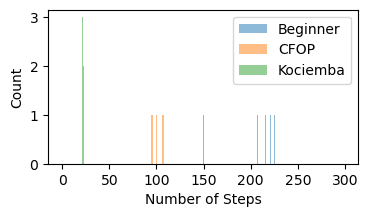

In [7]:
from pycubescrambler import nxn,side,non

# Python >3.9 compatibility
import collections.abc
#hyper needs the four following aliases to be done manually.
collections.Iterable = collections.abc.Iterable
collections.Mapping = collections.abc.Mapping
collections.MutableSet = collections.abc.MutableSet
collections.MutableMapping = collections.abc.MutableMapping

from rubik_solver.Cubie import Cube
from rubik_solver import utils
from rubik_solver.Move import Move

# Plot histogram
import matplotlib.pyplot as plt
import numpy as np

def cube_solve(scramble:str, solver:str): 
    cube = Cube()
    for move in scramble.split(' ')[:-1]:
        cube.move(Move(move))
    naive = cube.to_naive_cube()
    cubestr = naive.get_cube()
    sln = utils.solve(cubestr, solver)
    return sln

N_TRIES = 200
plt.figure(figsize=(4, 2))
for solver in ['Beginner', 'CFOP', 'Kociemba']:
    print("Using the", solver, "solver")
    sln_len_list = []
    for i in range(N_TRIES):
        scramble=nxn.get3()
        sln = cube_solve(scramble, solver)
        print(i, len(sln))
        sln_len_list.append(len(sln))

    plt.hist(sln_len_list, bins=np.arange(0, 300, 1), alpha=0.5, label=solver)

plt.xlabel('Number of Steps')
plt.ylabel('Count')
plt.legend()
plt.show()

